# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

Aluno: Rodrigo de Miranda Videira  <br>
RM: RM340347

____

## Exercício 1

## Imports

In [368]:
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

### a) IRIS

In [370]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [371]:
num_classes = len(iris.target_names)
num_features = len(iris.feature_names)

print(f"Número de classes = {num_classes} e número de features = {num_features}")

Número de classes = 3 e número de features = 4


In [372]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=42)

In [373]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [374]:
X_train.shape

(105, 4)

In [375]:
iris_classificacao = tf.keras.Sequential();

In [376]:
iris_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=5, kernel_initializer='uniform'))

In [377]:
iris_classificacao.add(tf.keras.layers.Dense(activation='sigmoid', units=num_classes, kernel_initializer='uniform'))

In [378]:
iris_classificacao.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [379]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='iris.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

In [380]:
hist = iris_classificacao.fit(X_train, y_train, epochs=50, batch_size=2, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/50
 1/42 [..............................] - ETA: 12s - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.47619, saving model to iris.hdf5
42/42 [==============================] - 1s 5ms/step - loss: 1.0988 - accuracy: 0.3214 - val_loss: 1.0916 - val_accuracy: 0.4762
Epoch 2/50
24/42 [================>.............] - ETA: 0s - loss: 1.0939 - accuracy: 0.3542    
Epoch 2: val_accuracy did not improve from 0.47619
42/42 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.3214 - val_loss: 1.0839 - val_accuracy: 0.4762
Epoch 3/50
 1/42 [..............................] - ETA: 0s - loss: 1.0847 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.47619
42/42 [==============================] - 0s 2ms/step - loss: 1.0895 - accuracy: 0.3214 - val_loss: 1.0710 - val_accuracy: 0.4762
Epoch 4/50
 1/42 [..............................] - ETA: 0s - loss: 1.0693 - accuracy: 0.5000
Epoch 4: val_accuracy did not improve from 0.47

Epoch 30/50
 1/42 [..............................] - ETA: 0s - loss: 0.4782 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 1.00000
42/42 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.9405 - val_loss: 0.4153 - val_accuracy: 1.0000
Epoch 31/50
 1/42 [..............................] - ETA: 0s - loss: 0.4895 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 1.00000
42/42 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.9643 - val_loss: 0.4031 - val_accuracy: 1.0000
Epoch 32/50
36/42 [========================>.....] - ETA: 0s - loss: 0.3704 - accuracy: 0.9583
Epoch 32: val_accuracy did not improve from 1.00000
42/42 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.9524 - val_loss: 0.3919 - val_accuracy: 1.0000
Epoch 33/50
42/42 [==============================] - ETA: 0s - loss: 0.3653 - accuracy: 0.9524
Epoch 33: val_accuracy did not improve from 1.00000
42/42 [==================

In [381]:
iris_classificacao_best = tf.keras.models.load_model('iris.hdf5')

In [382]:
test_results = iris_classificacao_best.evaluate(X_test, y_test, verbose=1)
print(f'Resultado dos testes - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

2/2 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.9778
Resultado dos testes - Loss: 0.42397668957710266 - Accuracy: 0.9777777791023254%


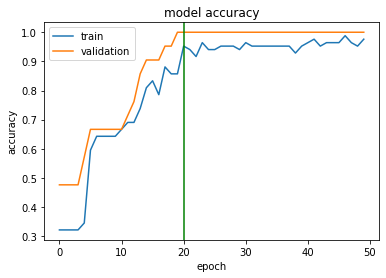

In [384]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# Melhor época - 20
plt.axvline(x=20, ymin=0, ymax=1, c='green')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [420]:
# Testando uma amostra
amostra_iris = X_test[20]
amostra_iris.reshape(1,4)

array([[4.7, 3.2, 1.6, 0.2]])

In [421]:
print(y_test[20])
print(iris.target_names)

# Classe correta - Setosa

[1. 0. 0.]
['setosa' 'versicolor' 'virginica']


In [422]:
iris_classificacao_best.predict(amostra_iris.reshape(1,4))

1/1 [==============================] - 0s 21ms/step


array([[0.79488534, 0.41725725, 0.14707544]], dtype=float32)

____

### b) Heart Disease UCI

In [3]:
df_heart_disease = pd.read_csv('datasets/heart_cleveland_upload.csv')

In [4]:
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
